In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools
from ipywidgets import interact, interactive
#!pip install pymc3==3.11.5
import pymc3 as pm 
from pymc3 import glm
import arviz as az

#Question 1: Casual Inference

In [198]:
# Asthma dataset

df_asthma = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/U.S._Chronic_Disease_Indicators__Asthma(1).csv')

In [199]:
# Census and American Community Survey demographics dataset

demo_2010 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2010.DP05-2022-12-11T023407.csv')
demo_2011 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2011.DP05-2022-12-11T023727.csv')
demo_2012 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2012.DP05-2022-12-11T023740.csv')
demo_2013 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2013.DP05-2022-12-11T023749.csv')
demo_2014 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2014.DP05-2022-12-11T023757.csv')
demo_2015 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2015.DP05-2022-12-11T023808.csv')
demo_2016 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2016.DP05-2022-12-11T023815.csv')
demo_2017 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2017.DP05-2022-12-11T023821.csv')
demo_2018 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2018.DP05-2022-12-11T023829.csv')
demo_2019 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/demographicdata/ACSDP1Y2019.DP05-2022-12-11T023836.csv')
demo = [demo_2010, demo_2011, demo_2012, demo_2013, demo_2014, demo_2015, demo_2016, demo_2017, demo_2018, demo_2019]
demo_all = pd.concat(demo, ignore_index=True)
#demo_all.tail(20)

In [200]:
# Census and American Community Survey economics dataset

econ_2010 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2010.DP03-2022-12-11T024242.csv')
econ_2011 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2011.DP03-2022-12-11T024304.csv')
econ_2012 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2012.DP03-2022-12-11T024314.csv')
econ_2013 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2013.DP03-2022-12-11T024323.csv')
econ_2014 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2014.DP03-2022-12-11T024330.csv')
econ_2015 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2015.DP03-2022-12-11T024338.csv')
econ_2016 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2016.DP03-2022-12-11T024346.csv')
econ_2017 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2017.DP03-2022-12-11T024352.csv')
econ_2018 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2018.DP03-2022-12-11T024359.csv')
econ_2019 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/economicdata/ACSDP1Y2019.DP03-2022-12-11T024406.csv')
econ = [econ_2010, econ_2011, econ_2012, econ_2013, econ_2014, econ_2015, econ_2016, econ_2017, econ_2018, econ_2019]
econ_all = pd.concat(econ, ignore_index=True)
#econ_all.tail(20)

In [201]:
# AQI dataset

df_aqi_2010 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1).csv')
df_aqi_2011 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy.csv')
df_aqi_2012 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy%202.csv')
df_aqi_2013 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy%203.csv')
df_aqi_2014 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy%204.csv')
df_aqi_2015 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy%205.csv')
df_aqi_2016 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy%206.csv')
df_aqi_2017 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy%207.csv')
df_aqi_2018 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy%208.csv')
df_aqi_2019 = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/ad_viz_plotval_data%20(1)%20copy%209.csv')
df_aqis = [df_aqi_2010, df_aqi_2011, df_aqi_2012, df_aqi_2013, df_aqi_2014, df_aqi_2015, df_aqi_2016, df_aqi_2017, df_aqi_2018, df_aqi_2019]
df_aqi_all = pd.concat(df_aqis, ignore_index=True)
#df_aqi_all.tail(20)

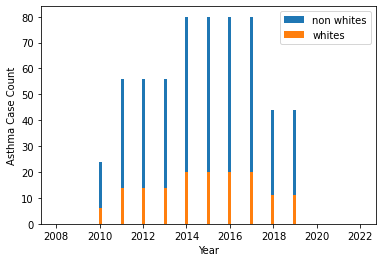

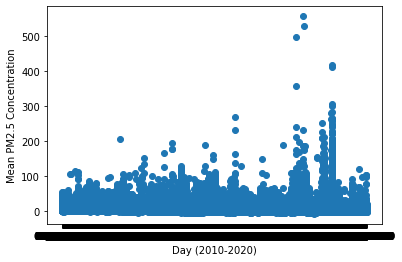

In [202]:
# Asthma and PM2.5 data EDA

rAsma = df_asthma.copy(deep=True)
rAsma = rAsma[rAsma["StratificationCategoryID1"]=="RACE"]
rAsma = rAsma[rAsma["LocationAbbr"]=="CA"]
wAsma = rAsma[rAsma["StratificationID1"]=="WHT"] #white
nwAsma = rAsma[rAsma["StratificationID1"]!="WHT"] #notwhite
y = wAsma["YearStart"]
x = nwAsma["YearStart"]
bins = np.linspace(2008, 2022, 100)
plt.hist(x, bins, label='non whites')
plt.hist(y, bins, label='whites')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Asthma Case Count')
plt.show()
plt.scatter(df_aqi_all["Date"], df_aqi_all["Daily Mean PM2.5 Concentration"])
plt.xlabel('Day (2010-2020)')
plt.ylabel('Mean PM2.5 Concentration')
plt.show()

In [203]:
# State data on asthma

oh_2010 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/10.csv')
oh_2011 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/11.csv')
oh_2012 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/12.csv')
oh_2013 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/13.csv')
oh_2014 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/14.csv')
oh_2015 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/15.csv')
oh_2016 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/16.csv')
oh_2017 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/17.csv')
oh_2018 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/18.csv')
oh_2019 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/ohio/19.csv')
oh = [oh_2010, oh_2011, oh_2012, oh_2013, oh_2014, oh_2015, oh_2016, oh_2017, oh_2018, oh_2019]
oh_all = pd.concat(oh, ignore_index=True)
#oh_all.tail(20)

ny_2010 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/10.csv')
ny_2011 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/11.csv')
ny_2012 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/12.csv')
ny_2013 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/13.csv')
ny_2014 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/14.csv')
ny_2015 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/15.csv')
ny_2016 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/16.csv')
ny_2017 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/17.csv')
ny_2018 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/18.csv')
ny_2019 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/new%20york/19.csv')
ny = [ny_2010, ny_2011, ny_2012, ny_2013, ny_2014, ny_2015, ny_2016, ny_2017, ny_2018, ny_2019]
ny_all = pd.concat(ny, ignore_index=True)
#ny_all.tail(20)

tx_2010 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/10.csv')
tx_2011 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/11.csv')
tx_2012 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/12.csv')
tx_2013 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/13.csv')
tx_2014 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/14.csv')
tx_2015 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/15.csv')
tx_2016 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/16.csv')
tx_2017 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/17.csv')
tx_2018 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/18.csv')
tx_2019 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/texas/19.csv')
tx = [tx_2010,tx_2011, tx_2012, tx_2013, tx_2014, tx_2015, tx_2016, tx_2017, tx_2018, tx_2019]
tx_all = pd.concat(tx, ignore_index=True)
#tx_all.tail(20)

pa_2010 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/10.csv')
pa_2011 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/11.csv')
pa_2012 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/12.csv')
pa_2013 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/13.csv')
pa_2014 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/14.csv')
pa_2015 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/15.csv')
pa_2016 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/16.csv')
pa_2017 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/17.csv')
pa_2018 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/18.csv')
pa_2019 = pd.read_csv('https://raw.githubusercontent.com/ultf4/athsmadatacdc/main/untitled%20folder/penn/19.csv')
pa = [pa_2010,pa_2011, pa_2012, pa_2013, pa_2014, pa_2015, pa_2016, pa_2017, pa_2018, pa_2019]
pa_all = pd.concat(pa, ignore_index=True)
#pa_all.tail(20)

In [204]:
# Creating new dataframe with states & years, asthma

states = [ 'CA','TX', 'PA', 'OH','NY']

stateyear = []

for i in states:
  for j in range(10):
    year = str(2010+j)
    stateyear.append(i+" "+year)
df1 = pd.Series(stateyear, name='State_and_Year')
#df1

df_asthma_ca = df_asthma[df_asthma['LocationAbbr']=='CA']

awesome = []
for i in states:

  dfa = df_asthma[df_asthma['LocationAbbr']==i]
  for j in range(10):
    awesome.append(dfa[dfa['YearStart']==2010+j].shape[0])
df2 = pd.Series(awesome, name='Asthma_Cases')

df = pd.concat([df1,df2],axis=1)


dfstates = pd.concat([df_aqi_all,ny_all, pa_all, tx_all, oh_all],ignore_index=True)
#dfstates

In [205]:
# Updating dataframe with PM2.5 data

caliaqi = dfstates[dfstates['STATE']=="California"]
caliyear = [int(i[8:10]) for i in caliaqi["Date"]]
caliaqi["Year"] = pd.Series(caliyear)


allyear = [int(i[8:10]) for i in dfstates["Date"]]
dfstates["Year"] = pd.Series(allyear)
#dfstates

cali2010 = caliaqi[caliaqi['Year']=="10"]
np.mean(cali2010["Daily Mean PM2.5 Concentration"].tolist())
meanpmbyyr = []
for i in range(10):
  #year = i
  calixyear = caliaqi[caliaqi['Year']==10+i]
  meanc = np.mean(calixyear["Daily Mean PM2.5 Concentration"].tolist())
  meanpmbyyr.append(meanc)

#meanpmbyyr
pm25 = pd.Series(meanpmbyyr, name='pm2.5')

ameanpmbyyr = []
for i in states:
  for i in range(10):
    calixyear = dfstates[dfstates['Year']==10+i]
    meanc = np.mean(calixyear["Daily Mean PM2.5 Concentration"].tolist())
    ameanpmbyyr.append(meanc)

#ameanpmbyyr
allpm25 = pd.Series(ameanpmbyyr, name='pm2.5')
#allpm25

df["PM2.5_Concentration"] = allpm25
#df

<ipython-input-205-62ef05482448>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caliaqi["Year"] = pd.Series(caliyear)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [206]:
# Updating dataframe with non-white percentage and median income data

non_white_percentages_ca = [1 - float(demo_2010['California!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2011['California!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2012['California!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2013['California!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2014['California!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2015['California!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2016['California!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2017['California!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2018['California!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2019['California!!Percent'][75].replace('%', '')) / 100]
non_white_percentages_tx = [1 - float(demo_2010['Texas!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2011['Texas!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2012['Texas!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2013['Texas!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2014['Texas!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2015['Texas!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2016['Texas!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2017['Texas!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2018['Texas!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2019['Texas!!Percent'][75].replace('%', '')) / 100]
non_white_percentages_pa = [1 - float(demo_2010['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2011['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2012['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2013['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2014['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2015['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2016['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2017['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2018['Pennsylvania!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2019['Pennsylvania!!Percent'][75].replace('%', '')) / 100]
non_white_percentages_oh = [1 - float(demo_2010['Ohio!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2011['Ohio!!Percent'][75].replace('%', '')) / 100, 
                            1 - float(demo_2012['Ohio!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2013['Ohio!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2014['Ohio!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2015['Ohio!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2016['Ohio!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2017['Ohio!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2018['Ohio!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2019['Ohio!!Percent'][75].replace('%', '')) / 100]
non_white_percentages_ny = [1 - float(demo_2010['New York!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2011['New York!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2012['New York!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2013['New York!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2014['New York!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2015['New York!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2016['New York!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2017['New York!!Percent'][75].replace('%', '')) / 100, 
                         1 - float(demo_2018['New York!!Percent'][75].replace('%', '')) / 100, 1 - float(demo_2019['New York!!Percent'][75].replace('%', '')) / 100]

non_white_percentages = np.concatenate((non_white_percentages_ca, non_white_percentages_tx, non_white_percentages_pa, non_white_percentages_oh, non_white_percentages_ny))

median_incomes_ca = [float(econ_2010['California!!Estimate'][67].replace(',', '')), float(econ_2011['California!!Estimate'][67].replace(',', '')), float(econ_2012['California!!Estimate'][67].replace(',', '')), 
                  float(econ_2013['California!!Estimate'][67].replace(',', '')), float(econ_2014['California!!Estimate'][67].replace(',', '')), float(econ_2015['California!!Estimate'][67].replace(',', '')), 
                  float(econ_2016['California!!Estimate'][67].replace(',', '')), float(econ_2017['California!!Estimate'][67].replace(',', '')), float(econ_2018['California!!Estimate'][67].replace(',', '')), 
                  float(econ_2019['California!!Estimate'][67].replace(',', ''))]
median_incomes_tx = [float(econ_2010['Texas!!Estimate'][67].replace(',', '')), float(econ_2011['Texas!!Estimate'][67].replace(',', '')), float(econ_2012['Texas!!Estimate'][67].replace(',', '')), 
                  float(econ_2013['Texas!!Estimate'][67].replace(',', '')), float(econ_2014['Texas!!Estimate'][67].replace(',', '')), float(econ_2015['Texas!!Estimate'][67].replace(',', '')), 
                  float(econ_2016['Texas!!Estimate'][67].replace(',', '')), float(econ_2017['Texas!!Estimate'][67].replace(',', '')), float(econ_2018['Texas!!Estimate'][67].replace(',', '')), 
                  float(econ_2019['Texas!!Estimate'][67].replace(',', ''))]
median_incomes_pa = [float(econ_2010['Pennsylvania!!Estimate'][67].replace(',', '')), float(econ_2011['Pennsylvania!!Estimate'][67].replace(',', '')), float(econ_2012['Pennsylvania!!Estimate'][67].replace(',', '')), 
                  float(econ_2013['Pennsylvania!!Estimate'][67].replace(',', '')), float(econ_2014['Pennsylvania!!Estimate'][67].replace(',', '')), float(econ_2015['Pennsylvania!!Estimate'][67].replace(',', '')), 
                  float(econ_2016['Pennsylvania!!Estimate'][67].replace(',', '')), float(econ_2017['Pennsylvania!!Estimate'][67].replace(',', '')), float(econ_2018['Pennsylvania!!Estimate'][67].replace(',', '')), 
                  float(econ_2019['Pennsylvania!!Estimate'][67].replace(',', ''))]
median_incomes_oh = [float(econ_2010['Ohio!!Estimate'][67].replace(',', '')), float(econ_2011['Ohio!!Estimate'][67].replace(',', '')), float(econ_2012['Ohio!!Estimate'][67].replace(',', '')), 
                  float(econ_2013['Ohio!!Estimate'][67].replace(',', '')), float(econ_2014['Ohio!!Estimate'][67].replace(',', '')), float(econ_2015['Ohio!!Estimate'][67].replace(',', '')), 
                  float(econ_2016['Ohio!!Estimate'][67].replace(',', '')), float(econ_2017['Ohio!!Estimate'][67].replace(',', '')), float(econ_2018['Ohio!!Estimate'][67].replace(',', '')), 
                  float(econ_2019['Ohio!!Estimate'][67].replace(',', ''))]
median_incomes_ny = [float(econ_2010['New York!!Estimate'][67].replace(',', '')), float(econ_2011['New York!!Estimate'][67].replace(',', '')), float(econ_2012['New York!!Estimate'][67].replace(',', '')), 
                  float(econ_2013['New York!!Estimate'][67].replace(',', '')), float(econ_2014['New York!!Estimate'][67].replace(',', '')), float(econ_2015['New York!!Estimate'][67].replace(',', '')), 
                  float(econ_2016['New York!!Estimate'][67].replace(',', '')), float(econ_2017['New York!!Estimate'][67].replace(',', '')), float(econ_2018['New York!!Estimate'][67].replace(',', '')), 
                  float(econ_2019['New York!!Estimate'][67].replace(',', ''))]

median_incomes = np.concatenate((median_incomes_ca, median_incomes_tx, median_incomes_pa, median_incomes_oh, median_incomes_ny))

df['Non-White_Percentage'] = non_white_percentages
df['Median_Income'] = median_incomes
df

,State_and_Year,Asthma_Cases,PM2.5_Concentration,Non-White_Percentage,Median_Income
0,CA 2010,57,10.520793,0.600,57708.0
1,CA 2011,110,10.987127,0.604,57287.0
2,CA 2012,110,10.047810,0.608,58328.0
3,CA 2013,122,10.103965,0.612,60190.0
4,CA 2014,158,9.718503,0.617,61933.0
5,CA 2015,158,9.432420,0.622,64500.0
6,CA 2016,158,8.557193,0.625,67739.0
7,CA 2017,158,9.137451,0.676,71805.0
8,CA 2018,86,9.623789,0.676,75277.0
9,CA 2019,86,7.931051,0.674,80440.0


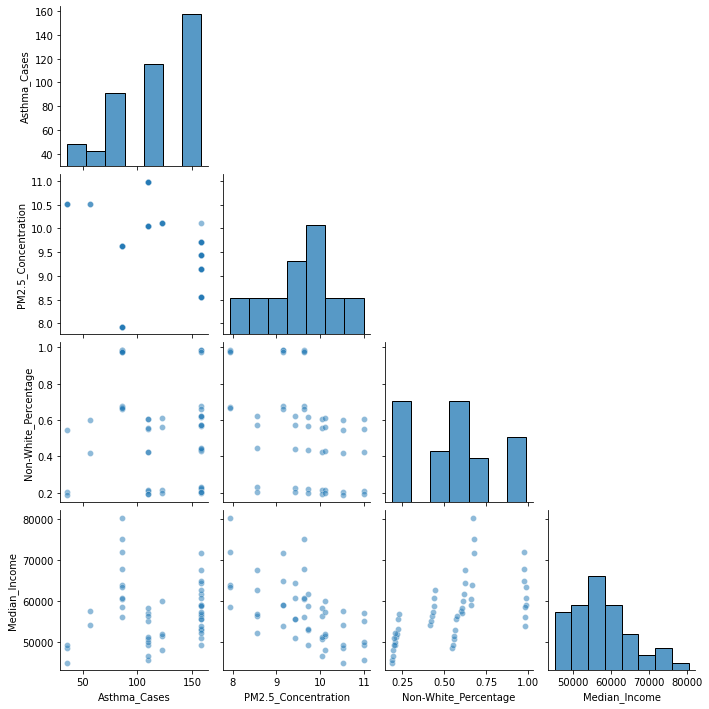

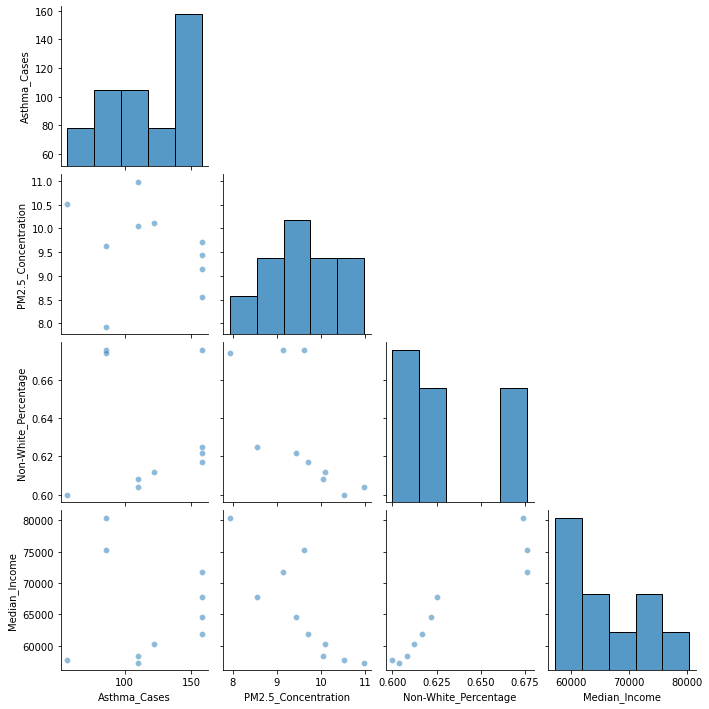

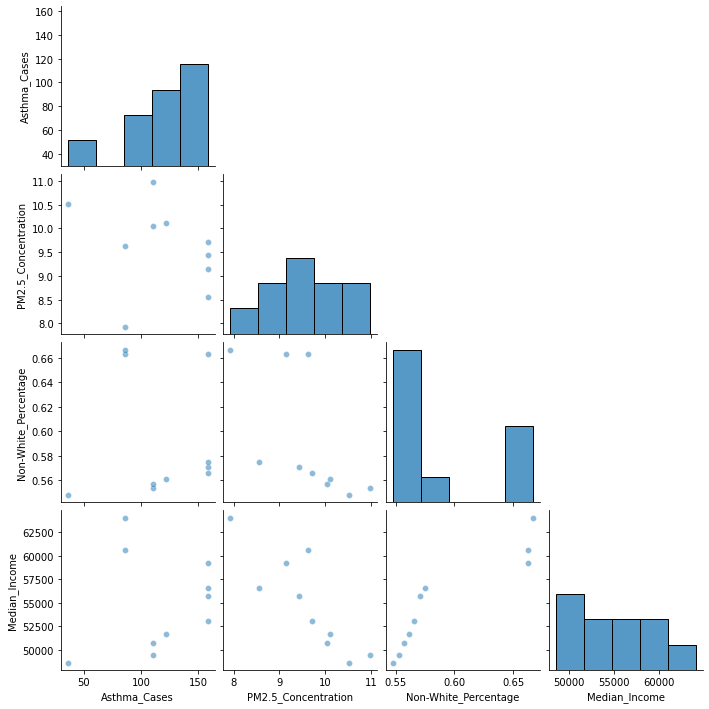

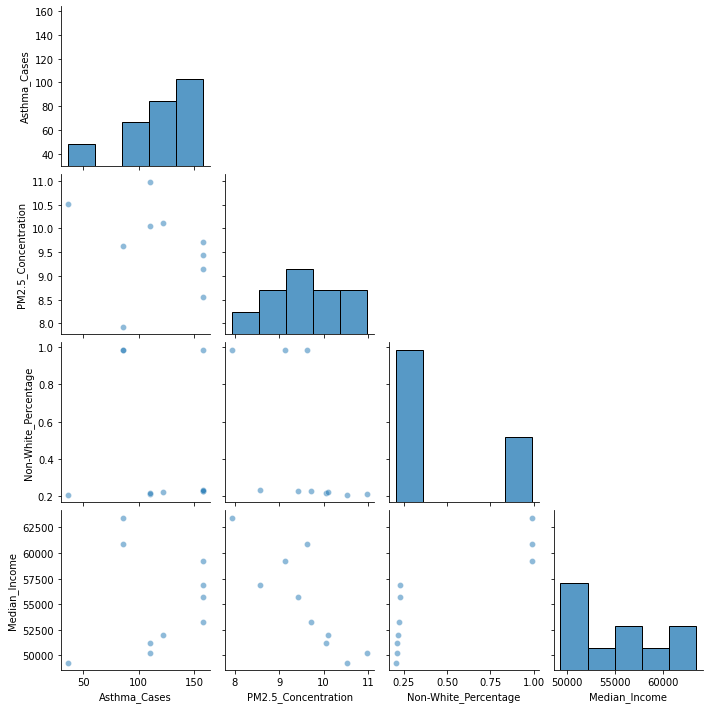

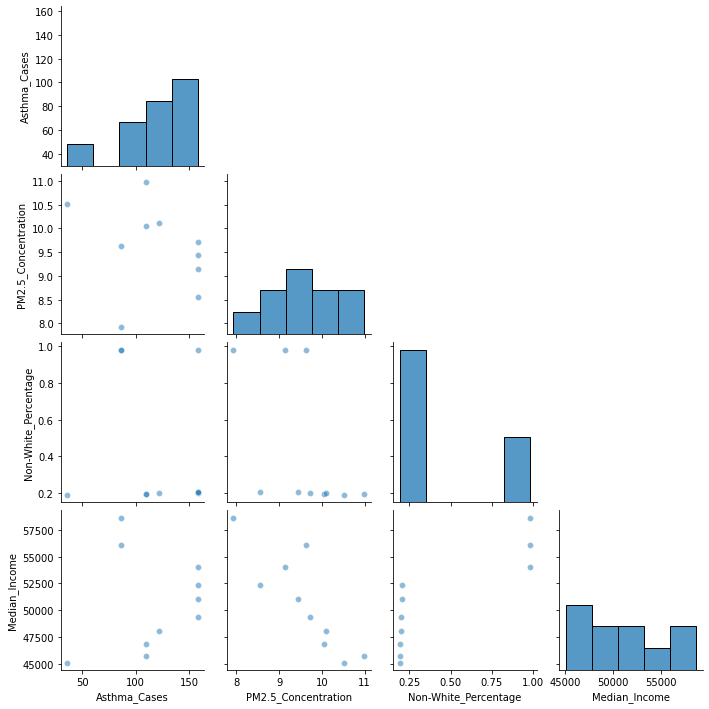

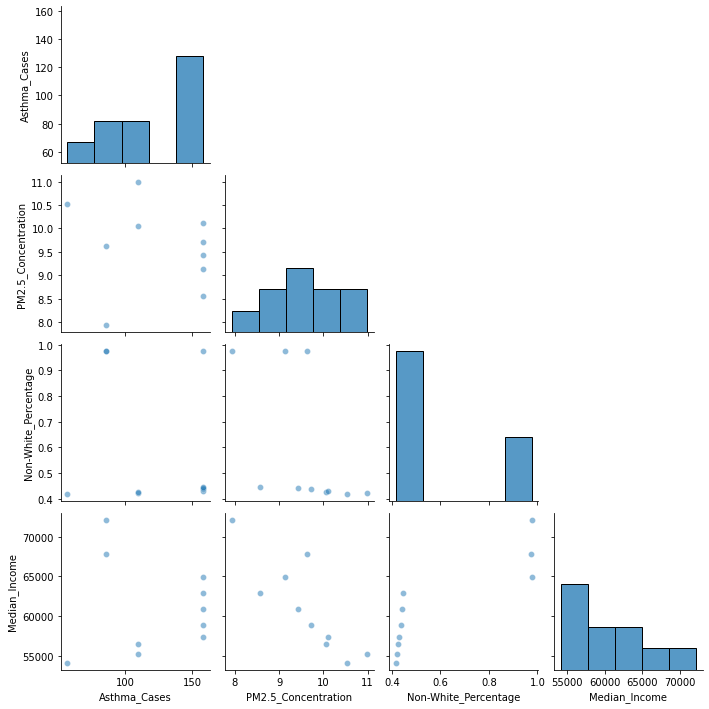

In [207]:
# Generating a pairplot for each state to display pairwise correlations between the dataset's columns

fig_overall = sns.pairplot(df, plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig_overall.axes, 1)):
  fig_overall.axes[i, j].set_visible(False)
plt.show()

fig_ca = sns.pairplot(df[:10], plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig_ca.axes, 1)):
  fig_ca.axes[i, j].set_visible(False)
plt.show()

fig_tx = sns.pairplot(df[10:20], plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig_tx.axes, 1)):
  fig_tx.axes[i, j].set_visible(False)
plt.show()

fig_pa = sns.pairplot(df[20:30], plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig_pa.axes, 1)):
  fig_pa.axes[i, j].set_visible(False)
plt.show()

fig_oh = sns.pairplot(df[30:40], plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig_oh.axes, 1)):
  fig_oh.axes[i, j].set_visible(False)
plt.show()

fig_ny = sns.pairplot(df[40:], plot_kws=dict(marker="o", alpha = 0.5))
for i, j in zip(*np.triu_indices_from(fig_ny.axes, 1)):
  fig_ny.axes[i, j].set_visible(False)
plt.show()

In [208]:
# Creating OLS model function

import statsmodels.api as sm

def OLS_model(df, input_vars, output_var, intercept=False):
  inputs = df[input_vars]
  output = df[output_var]
  if intercept:
    inputs = sm.add_constant(inputs)
  return sm.OLS(output, inputs).fit()

In [209]:
# Generating multiple models for each state

overall_model_1 = OLS_model(df, ['PM2.5_Concentration'], 'Asthma_Cases')
overall_model_2 = OLS_model(df, ['Non-White_Percentage'], 'Asthma_Cases')
overall_model_3 = OLS_model(df, ['Median_Income'], 'Asthma_Cases')
overall_model_4 = OLS_model(df, ['PM2.5_Concentration', 'Non-White_Percentage'], 'Asthma_Cases')
overall_model_5 = OLS_model(df, ['PM2.5_Concentration', 'Median_Income'], 'Asthma_Cases')
overall_model_6 = OLS_model(df, ['PM2.5_Concentration', 'Non-White_Percentage', 'Median_Income'], 'Asthma_Cases')

ca_model_1 = OLS_model(df[:10], ['PM2.5_Concentration'], 'Asthma_Cases')
ca_model_2 = OLS_model(df[:10], ['Non-White_Percentage'], 'Asthma_Cases')
ca_model_3 = OLS_model(df[:10], ['Median_Income'], 'Asthma_Cases')
ca_model_4 = OLS_model(df[:10], ['PM2.5_Concentration', 'Non-White_Percentage'], 'Asthma_Cases')
ca_model_5 = OLS_model(df[:10], ['PM2.5_Concentration', 'Median_Income'], 'Asthma_Cases')
ca_model_6 = OLS_model(df[:10], ['PM2.5_Concentration', 'Non-White_Percentage', 'Median_Income'], 'Asthma_Cases')

tx_model_1 = OLS_model(df[10:20], ['PM2.5_Concentration'], 'Asthma_Cases')
tx_model_2 = OLS_model(df[10:20], ['Non-White_Percentage'], 'Asthma_Cases')
tx_model_3 = OLS_model(df[10:20], ['Median_Income'], 'Asthma_Cases')
tx_model_4 = OLS_model(df[10:20], ['PM2.5_Concentration', 'Non-White_Percentage'], 'Asthma_Cases')
tx_model_5 = OLS_model(df[10:20], ['PM2.5_Concentration', 'Median_Income'], 'Asthma_Cases')
tx_model_6 = OLS_model(df[10:20], ['PM2.5_Concentration', 'Non-White_Percentage', 'Median_Income'], 'Asthma_Cases')

pa_model_1 = OLS_model(df[20:30], ['PM2.5_Concentration'], 'Asthma_Cases')
pa_model_2 = OLS_model(df[20:30], ['Non-White_Percentage'], 'Asthma_Cases')
pa_model_3 = OLS_model(df[20:30], ['Median_Income'], 'Asthma_Cases')
pa_model_4 = OLS_model(df[20:30], ['PM2.5_Concentration', 'Non-White_Percentage'], 'Asthma_Cases')
pa_model_5 = OLS_model(df[20:30], ['PM2.5_Concentration', 'Median_Income'], 'Asthma_Cases')
pa_model_6 = OLS_model(df[20:30], ['PM2.5_Concentration', 'Non-White_Percentage', 'Median_Income'], 'Asthma_Cases')

oh_model_1 = OLS_model(df[30:40], ['PM2.5_Concentration'], 'Asthma_Cases')
oh_model_2 = OLS_model(df[30:40], ['Non-White_Percentage'], 'Asthma_Cases')
oh_model_3 = OLS_model(df[30:40], ['Median_Income'], 'Asthma_Cases')
oh_model_4 = OLS_model(df[30:40], ['PM2.5_Concentration', 'Non-White_Percentage'], 'Asthma_Cases')
oh_model_5 = OLS_model(df[30:40], ['PM2.5_Concentration', 'Median_Income'], 'Asthma_Cases')
oh_model_6 = OLS_model(df[30:40], ['PM2.5_Concentration', 'Non-White_Percentage', 'Median_Income'], 'Asthma_Cases')

ny_model_1 = OLS_model(df[40:], ['PM2.5_Concentration'], 'Asthma_Cases')
ny_model_2 = OLS_model(df[40:], ['Non-White_Percentage'], 'Asthma_Cases')
ny_model_3 = OLS_model(df[40:], ['Median_Income'], 'Asthma_Cases')
ny_model_4 = OLS_model(df[40:], ['PM2.5_Concentration', 'Non-White_Percentage'], 'Asthma_Cases')
ny_model_5 = OLS_model(df[40:], ['PM2.5_Concentration', 'Median_Income'], 'Asthma_Cases')
ny_model_6 = OLS_model(df[40:], ['PM2.5_Concentration', 'Non-White_Percentage', 'Median_Income'], 'Asthma_Cases')

In [210]:
# Printing summaries for each model generated for each state

print(overall_model_1.summary())
print(overall_model_2.summary())
print(overall_model_3.summary())
print(overall_model_4.summary())
print(overall_model_5.summary())
print(overall_model_6.summary())

print(ca_model_1.summary())
print(ca_model_2.summary())
print(ca_model_3.summary())
print(ca_model_4.summary())
print(ca_model_5.summary())
print(ca_model_6.summary())

print(tx_model_1.summary())
print(tx_model_2.summary())
print(tx_model_3.summary())
print(tx_model_4.summary())
print(tx_model_5.summary())
print(tx_model_6.summary())

print(pa_model_1.summary())
print(pa_model_2.summary())
print(pa_model_3.summary())
print(pa_model_4.summary())
print(pa_model_5.summary())
print(pa_model_6.summary())

print(oh_model_1.summary())
print(oh_model_2.summary())
print(oh_model_3.summary())
print(oh_model_4.summary())
print(oh_model_5.summary())
print(oh_model_6.summary())

print(ny_model_1.summary())
print(ny_model_2.summary())
print(ny_model_3.summary())
print(ny_model_4.summary())
print(ny_model_5.summary())
print(ny_model_6.summary())

                                 OLS Regression Results                                
Dep. Variable:           Asthma_Cases   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              388.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    6.00e-25
Time:                        07:58:29   Log-Likelihood:                         -257.87
No. Observations:                  50   AIC:                                      517.7
Df Residuals:                      49   BIC:                                      519.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtos

                                 OLS Regression Results                                
Dep. Variable:           Asthma_Cases   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              28.82
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    0.000260
Time:                        07:58:29   Log-Likelihood:                         -49.475
No. Observations:                  10   AIC:                                      105.0
Df Residuals:                       7   BIC:                                      105.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#Question 2: 
##EDA

In [211]:
ca_2010_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(1).csv')
ca_2011_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(2).csv')
ca_2012_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(3).csv')
ca_2013_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(4).csv')
ca_2014_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(1)%20copy.csv')
ca_2015_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(1)%20copy%202.csv')
ca_2016_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(1)%20copy%203.csv')
ca_2017_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(1)%20copy%204.csv')
ca_2018_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(1)%20copy%205.csv')
ca_2019_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/CA_OZONE/ad_viz_plotval_data%20(1)%20copy%206.csv')

ca_ozone = [ca_2010_ozone,ca_2011_ozone,ca_2012_ozone,ca_2013_ozone,ca_2014_ozone,ca_2015_ozone,ca_2016_ozone,ca_2017_ozone,ca_2018_ozone,ca_2019_ozone]
ca_ozone_all = pd.concat(ca_ozone, ignore_index=True)


ny_2010_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(1).csv')
ny_2011_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(2).csv')
ny_2012_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(3).csv')
ny_2013_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(4).csv')
ny_2014_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(1)%20copy.csv')
ny_2015_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(1)%20copy%202.csv')
ny_2016_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(1)%20copy%203.csv')
ny_2017_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(1)%20copy%204.csv')
ny_2018_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(2)%20copy.csv')
ny_2019_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/NY_OZONE/ad_viz_plotval_data%20(3)%20copy.csv')

ny_ozone = [ny_2010_ozone,ny_2011_ozone,ny_2012_ozone,ny_2013_ozone,ny_2014_ozone,ny_2015_ozone,ny_2016_ozone,ny_2017_ozone,ny_2018_ozone,ny_2019_ozone]
ny_ozone_all = pd.concat(ny_ozone, ignore_index=True)

oh_2010_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(1)%20copy%204.csv')
oh_2011_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(1)%20copy%203.csv')
oh_2012_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(2)%20copy%202.csv')
oh_2013_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(1)%20copy%202.csv')
oh_2014_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(3)%20copy.csv')
oh_2015_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(2)%20copy.csv')
oh_2016_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(1)%20copy.csv')
oh_2017_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(3).csv')
oh_2018_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(2).csv')
oh_2019_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/OH_OZONE/ad_viz_plotval_data%20(1).csv')

oh_ozone = [oh_2010_ozone,oh_2011_ozone,oh_2012_ozone,oh_2013_ozone,oh_2014_ozone,oh_2015_ozone,oh_2016_ozone,oh_2017_ozone,oh_2018_ozone,oh_2019_ozone]
oh_ozone_all = pd.concat(oh_ozone, ignore_index=True)

pa_2010_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(1).csv')
pa_2011_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(2).csv')
pa_2012_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(3).csv')
pa_2013_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(4).csv')
pa_2014_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(1)%20copy.csv')
pa_2015_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(1)%20copy%202.csv')
pa_2016_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(2)%20copy.csv')
pa_2017_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(1)%20copy%203.csv')
pa_2018_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(1)%20copy%204.csv')
pa_2019_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/PA_OZONE/ad_viz_plotval_data%20(1)%20copy%205.csv')

pa_ozone = [pa_2010_ozone,pa_2011_ozone,pa_2012_ozone,pa_2013_ozone,pa_2014_ozone,pa_2015_ozone,pa_2016_ozone,pa_2017_ozone,pa_2018_ozone,pa_2019_ozone]
pa_ozone_all = pd.concat(pa_ozone, ignore_index=True)

tx_2010_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(1).csv')
tx_2011_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(2).csv')
tx_2012_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(3).csv')
tx_2013_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(1)%20copy.csv')
tx_2014_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(1)%20copy%202.csv')
tx_2015_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(2)%20copy.csv')
tx_2016_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(3)%20copy.csv')
tx_2017_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(1)%20copy%203.csv')
tx_2018_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(2)%20copy%202.csv')
tx_2019_ozone = pd.read_csv('https://raw.githubusercontent.com/sophiachadsey/Data102/main/TX_OZONE/ad_viz_plotval_data%20(1)%20copy%204.csv')

tx_ozone = [tx_2010_ozone,tx_2011_ozone,tx_2012_ozone,tx_2013_ozone,tx_2014_ozone,tx_2015_ozone,tx_2016_ozone,tx_2017_ozone,tx_2018_ozone,tx_2019_ozone]
tx_ozone_all = pd.concat(tx_ozone, ignore_index=True)





In [212]:
df_ozone_states = pd.concat([ca_ozone_all, ny_ozone_all, pa_ozone_all, tx_ozone_all, oh_ozone_all] ,ignore_index=True)
allyearozone = [int(i[8:10]) for i in dfstates["Date"]]
df_ozone_states["Year"] = pd.Series(allyear)
df_ozone_states

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Year
0,01/01/2010,AQS,60010007,1,0.018,ppm,17,Livermore,17,100.0,...,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,10.0
1,01/02/2010,AQS,60010007,1,0.020,ppm,19,Livermore,17,100.0,...,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,10.0
2,01/03/2010,AQS,60010007,1,0.020,ppm,19,Livermore,17,100.0,...,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,10.0
3,01/04/2010,AQS,60010007,1,0.015,ppm,14,Livermore,17,100.0,...,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,10.0
4,01/05/2010,AQS,60010007,1,0.010,ppm,9,Livermore,17,100.0,...,Ozone,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265903,10/26/2019,AQS,391730003,1,0.024,ppm,22,Bowling Green,17,100.0,...,Ozone,45780.0,"Toledo, OH",39,Ohio,173,Wood,41.377685,-83.611104,NaN
1265904,10/27/2019,AQS,391730003,1,0.032,ppm,30,Bowling Green,17,100.0,...,Ozone,45780.0,"Toledo, OH",39,Ohio,173,Wood,41.377685,-83.611104,NaN
1265905,10/28/2019,AQS,391730003,1,0.034,ppm,31,Bowling Green,17,100.0,...,Ozone,45780.0,"Toledo, OH",39,Ohio,173,Wood,41.377685,-83.611104,NaN
1265906,10/29/2019,AQS,391730003,1,0.022,ppm,20,Bowling Green,17,100.0,...,Ozone,45780.0,"Toledo, OH",39,Ohio,173,Wood,41.377685,-83.611104,NaN


In [213]:
meanOzone = []
for i in states:
  for i in range(10):
    calixyear = df_ozone_states[df_ozone_states['Year']==10+i]
    meanc = np.mean(calixyear["Daily Max 8-hour Ozone Concentration"].tolist())
    meanOzone.append(meanc)

meanOzone
allozone = pd.Series(meanOzone, name='pm2.5')
df["Ozone"] = allozone
df

,State_and_Year,Asthma_Cases,PM2.5_Concentration,Non-White_Percentage,Median_Income,Ozone
0,CA 2010,57,10.520793,0.600,57708.0,0.040854
1,CA 2011,110,10.987127,0.604,57287.0,0.039899
2,CA 2012,110,10.047810,0.608,58328.0,0.040419
3,CA 2013,122,10.103965,0.612,60190.0,0.041223
4,CA 2014,158,9.718503,0.617,61933.0,0.040304
5,CA 2015,158,9.432420,0.622,64500.0,0.040162
6,CA 2016,158,8.557193,0.625,67739.0,0.041377
7,CA 2017,158,9.137451,0.676,71805.0,0.042234
8,CA 2018,86,9.623789,0.676,75277.0,0.042534
9,CA 2019,86,7.931051,0.674,80440.0,0.041314


In [214]:
df['State'] =df['State_and_Year'].str.split(' ').str[0]
df['Year'] =df['State_and_Year'].str.split(' ').str[1]

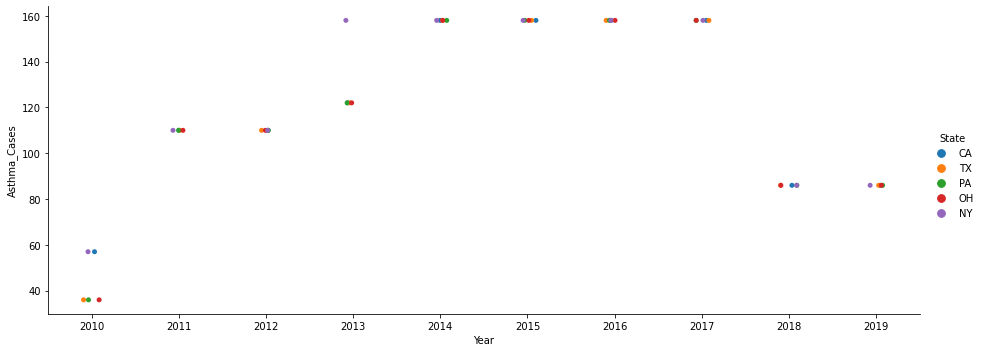

In [215]:
sns.catplot(x = 'Year', y = 'Asthma_Cases', data = df, hue = 'State', aspect = 13/5)

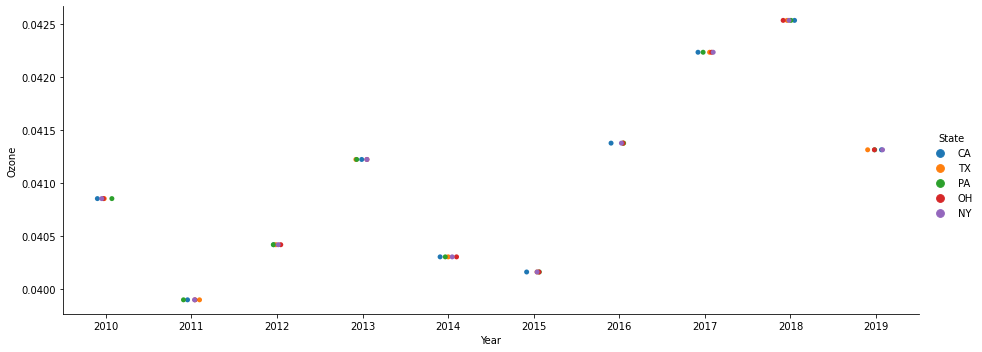

In [216]:
sns.catplot(x = 'Year', y = 'Ozone', data = df, hue = 'State', aspect = 13/5)

##GLM 
###Frequentist Method

In [217]:
gaussian = sm.GLM(df["Asthma_Cases"], 
                        sm.add_constant(df["Ozone"]), 
                        family=sm.families.Gaussian())
results_gauss = gaussian.fit()
print(results_gauss.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Asthma_Cases   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1486.6
Method:                          IRLS   Log-Likelihood:                -252.53
Date:                Tue, 13 Dec 2022   Deviance:                       71355.
Time:                        07:59:01   Pearson chi2:                 7.14e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        297.3986    269.153      1.105      0.2

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [218]:
binom = sm.GLM(df["Asthma_Cases"], 
                        sm.add_constant(df["Ozone"]), 
                        family=sm.families.Binomial())
results_bin = binom.fit()
print(results_bin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Asthma_Cases   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Tue, 13 Dec 2022   Deviance:                   4.8604e+05
Time:                        07:59:02   Pearson chi2:                 3.50e+21
No. Iterations:                     2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.003e+18   4.68e+08   4.28e+09      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [219]:
negbinom = sm.GLM(df["Asthma_Cases"], 
                        sm.add_constant(df["Ozone"]), 
                        family=sm.families.NegativeBinomial())
results_negbin = negbinom.fit()
print(results_negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Asthma_Cases   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -289.46
Date:                Tue, 13 Dec 2022   Deviance:                       6.6010
Time:                        07:59:03   Pearson chi2:                     4.97
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2404      7.010      0.890      0.3

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


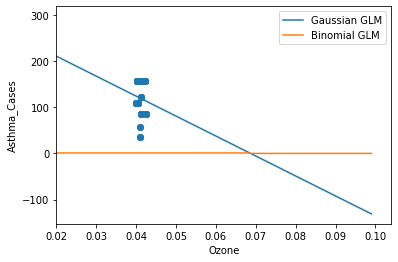

In [220]:
vals = np.arange(0, 0.1, 0.001)
plt.scatter(df["Ozone"], df['Asthma_Cases'])
plt.plot(vals, results_gauss.predict(sm.add_constant(vals)), label = "Gaussian GLM")
plt.plot(vals, results_bin.predict(sm.add_constant(vals)), label = "Binomial GLM")

plt.xlim(0.02)
plt.xlabel("Ozone")
plt.ylabel("Asthma_Cases")
plt.legend()
plt.show()

###Bayesian Method

In [221]:
with pm.Model() as gaussian_model:
  glm.GLM.from_formula('Asthma_Cases	~ Ozone', df)
  gaussian_trace = pm.sample(1000, cores = 2, target_accept = 0.95)

We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7b432dd30>,
      dtype=object)

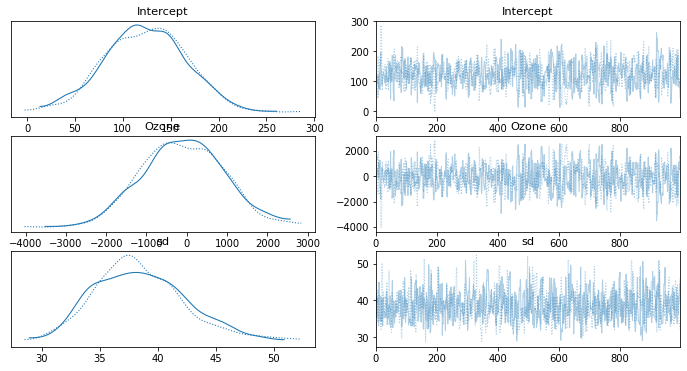

In [222]:
arviz.plot_trace(gaussian_trace)

In [223]:
# Compute the posterior regression function (y hat values) for each model
with gaussian_model:
    gaussian_ppc = pm.sample_posterior_predictive(gaussian_trace, var_names = ['Ozone', "Intercept", "y"])

In [224]:
y_hat_gaussian = np.exp(np.outer(gaussian_ppc["Ozone"], df.Ozone.values) + gaussian_ppc["Intercept"][:,np.newaxis])
y_hat_vals = [y_hat_gaussian]

/usr/local/lib/python3.8/dist-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


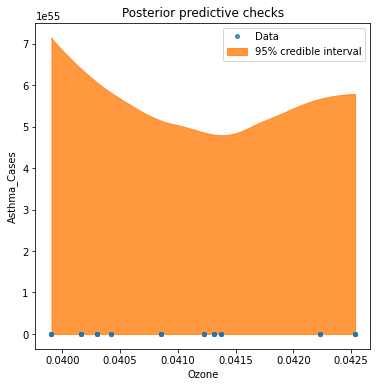

In [225]:
_, ax = plt.subplots(figsize = (6,6))
ax.plot(df["Ozone"], df["Asthma_Cases"], "o", ms=4, alpha=0.8, label="Data")
az.plot_hdi(df["Ozone"], y_hat_gaussian, ax=ax, hdi_prob=0.95, fill_kwargs={"alpha": 0.8, "label": "95% credible interval"})
ax.set_xlabel("Ozone")
ax.set_ylabel("Asthma_Cases")
ax.set_title("Posterior predictive checks")
ax.legend(fontsize=10);

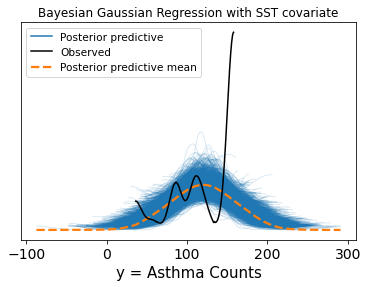

In [226]:
with gaussian_model:
    gaussian_ppc = pm.sample_posterior_predictive(gaussian_trace)
    gaussian_ppc['y'] = gaussian_ppc['y'] + 0.0
    ppc_gaussian = az.from_pymc3(gaussian_trace, posterior_predictive=gaussian_ppc)

# Plot PPC samples
az.plot_ppc(ppc_gaussian)
plt.xlabel('y = Asthma Counts')

plt.title('Bayesian Gaussian Regression with SST covariate')
plt.show()

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


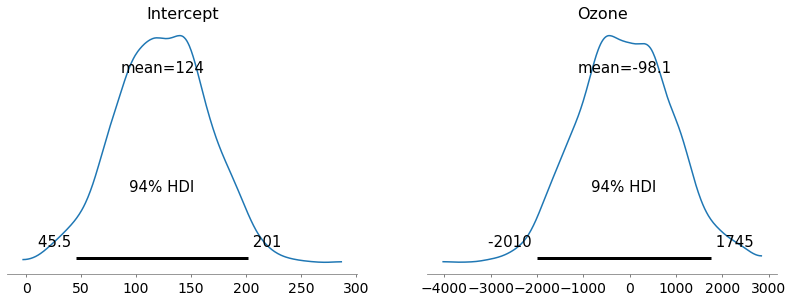

In [227]:
az.plot_posterior(gaussian_trace, ['Intercept', 'Ozone'], round_to = 3)
plt.show()

##Logistic Regression

In [228]:
#one hot encoding state 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['State'])
 
df['State']= label

In [229]:
from sklearn.model_selection import train_test_split
#TRAINING FOR ALL VARIABLES
#	State_and_Year	Asthma_Cases	PM2.5_Concentration	Non-White_Percentage	Median_Income	Ozone
feature_cols = ['PM2.5_Concentration', 'Non-White_Percentage', 'Median_Income', 'Ozone', 'State', 'Year']
X = df[feature_cols] # Features
y = df['Asthma_Cases'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#TRAINING FOR OZONE AND ASTHMA
feature_cols_ozone = ['Ozone']
X_ozone = df[feature_cols_ozone] # Features
y_ozone = df['Asthma_Cases'] # Target variable
X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone = train_test_split(X_ozone, y_ozone, test_size=0.25, random_state=42)

#TRAINING FOR PM2.5 AND OZONE AND ASTHMA aka environmental factors
feature_cols_envir = ['Ozone', 'PM2.5_Concentration']
X_envir = df[feature_cols_envir] # Features
y_envir = df['Asthma_Cases'] # Target variable
X_train_envir, X_test_envir, y_train_envir, y_test_envir = train_test_split(X_envir, y_envir, test_size=0.25, random_state=42)

#TRAINING FOR MEDIAN EARNINGS AND NON-WHITE PERCENTAGE aka social factors
feature_cols_social = ['Non-White_Percentage', 'Median_Income']
X_social = df[feature_cols_social] # Features
y_social = df['Asthma_Cases'] # Target variable
X_train_social, X_test_social, y_train_social, y_test_social = train_test_split(X_social, y_social, test_size=0.25, random_state=42)

In [230]:
from sklearn.linear_model import LogisticRegression
#make the model
logreg = LogisticRegression(random_state=42)

#Fit for all variables
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#Fit for ozone
logreg.fit(X_train_ozone, y_train_ozone)
y_pred_ozone = logreg.predict(X_test_ozone)

#Fit for environmental
logreg.fit(X_train_envir, y_train_envir)
y_pred_envir = logreg.predict(X_test_envir)

#Fit for social factors
logreg.fit(X_train_social, y_train_social)
y_pred_social = logreg.predict(X_test_social)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [231]:
# import the metrics class
from sklearn import metrics

#matrix for all variables
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#matrix for ozone
cnf_matrix_ozone = metrics.confusion_matrix(y_test_ozone, y_pred_ozone)
cnf_matrix_ozone

#matrix for environmental
cnf_matrix_envir = metrics.confusion_matrix(y_test_envir, y_pred_envir)
cnf_matrix_envir

#matrix for social factors
cnf_matrix_social = metrics.confusion_matrix(y_test_social, y_pred_social)
cnf_matrix_social

print(cnf_matrix, cnf_matrix_ozone, cnf_matrix_envir, cnf_matrix_social)

[[1 0 0 0 0]
 [0 1 0 0 2]
 [1 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 6]] [[0 0 0 0 1]
 [0 0 0 0 3]
 [0 0 0 0 2]
 [0 0 0 0 1]
 [0 0 0 0 6]] [[0 0 1 0 0]
 [0 0 0 0 3]
 [0 0 0 0 2]
 [0 0 0 0 1]
 [0 0 0 0 6]] [[0 0 0 0 1]
 [0 0 0 0 3]
 [0 0 0 0 2]
 [0 0 0 0 1]
 [0 0 0 0 6]]


In [232]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

#matrix for all variables

X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)
print (X_train[0:10, :])

#matrix for ozone

X_train_ozone = sc_x.fit_transform(X_train_ozone) 
X_test_ozone = sc_x.transform(X_test_ozone)
print (X_train_ozone[0:10, :])

#matrix for environmental

X_train_envir = sc_x.fit_transform(X_train_envir) 
X_test_envir = sc_x.transform(X_test_envir)
print (X_train_envir[0:10, :])

#matrix for social factors

X_train_social = sc_x.fit_transform(X_train_social) 
X_test_social = sc_x.transform(X_test_social)
print (X_train_social[0:10, :])

[[-0.08103518  0.55459526  2.19730045  1.82015462 -1.29062235  1.29419243]
 [ 0.47299548  0.30661913  0.29232022  0.26301032 -1.29062235 -0.44077568]
 [-1.31168143  0.35698928  1.2455048   0.44577066 -1.29062235  0.60020518]
 [ 1.49199415 -0.42956    -0.33194055 -1.30859207 -0.58837195 -1.13476292]
 [-1.31168143 -0.34044358  0.63563839  0.44577066 -0.58837195  0.60020518]
 [-0.64217525  1.71698337  0.88627707  1.46325915 -0.58837195  0.9471988 ]
 [-0.30183769  0.14775942 -0.28055015 -0.99687901  1.51837924  0.25321156]
 [-2.03412815  0.54684601  2.84921355  0.3712039  -1.29062235  1.64118605]
 [-1.31168143  0.16325793 -0.16539525  0.44577066  1.51837924  0.60020518]
 [ 0.02824631 -1.20061078 -0.58598842 -0.82755524  0.81612884 -0.09378206]]
[[ 1.82015462]
 [ 0.26301032]
 [ 0.44577066]
 [-1.30859207]
 [ 0.44577066]
 [ 1.46325915]
 [-0.99687901]
 [ 0.3712039 ]
 [ 0.44577066]
 [-0.82755524]]
[[ 1.82015462 -0.08103518]
 [ 0.26301032  0.47299548]
 [ 0.44577066 -1.31168143]
 [-1.30859207  1.

In [233]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



#classifier for all variables

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#classifier for ozone

classifier.fit(X_train_ozone, y_train_ozone)
y_pred_ozone = classifier.predict(X_test_ozone)

#classifier for environmental

classifier.fit(X_train_envir, y_train_envir)
y_pred_envir = classifier.predict(X_test_envir)

#classifier for social factors

classifier.fit(X_train_social, y_train_social)
y_pred_social = classifier.predict(X_test_social)

In [234]:
from sklearn.metrics import confusion_matrix

#classifier for all variables
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix for all variables: \n", cm)

#classifier for ozone
cm_ozone = confusion_matrix(y_test_ozone, y_pred_ozone)
print ("Confusion Matrix for only ozone: \n", cm_ozone)

#classifier for environmental
cm_envir = confusion_matrix(y_test_envir, y_pred_envir)
print ("Confusion Matrix for ozone and pm 2.5: \n", cm_envir)

#classifier for social factors
cm_social = confusion_matrix(y_test_social, y_pred_social)
print ("Confusion Matrix for median earnings and non-white percentage: \n", cm_social)

Confusion Matrix for all variables: 
 [[0 0 1 0 0]
 [0 2 0 0 1]
 [0 0 1 0 1]
 [0 0 0 0 1]
 [0 0 0 0 6]]
Confusion Matrix for only ozone: 
 [[0 0 0 0 1]
 [0 1 0 0 2]
 [0 0 0 0 2]
 [0 0 0 0 1]
 [0 2 2 0 2]]
Confusion Matrix for ozone and pm 2.5: 
 [[0 0 1 0 0]
 [0 1 0 0 2]
 [0 0 0 0 2]
 [0 0 0 0 1]
 [0 2 0 0 4]]
Confusion Matrix for median earnings and non-white percentage: 
 [[0 0 1 0 0]
 [0 2 0 0 1]
 [0 0 2 0 0]
 [0 0 0 0 1]
 [0 1 0 0 5]]


In [235]:
from sklearn.metrics import accuracy_score

#classifier for all variables
print ("Accuracy for all variables:", accuracy_score(y_test, y_pred))

#classifier for ozone
print ("Accuracy for only ozone:", accuracy_score(y_test_ozone, y_pred_ozone))

#classifier for environmental
print ("Accuracy for ozone and pm 2.5:", accuracy_score(y_test_envir, y_pred_envir))

#classifier for social factors
print ("Accuracy for median earnings and non-white percentage:", accuracy_score(y_test_social, y_pred_social))

Accuracy for all variables: 0.6923076923076923
Accuracy for only ozone: 0.23076923076923078
Accuracy for ozone and pm 2.5: 0.38461538461538464
Accuracy for median earnings and non-white percentage: 0.6923076923076923
